# Homework #6 (100 pts)
**Due:** Thursday February 22nd, 11:59PM via Blackboard.  

**Name:** **Anish Doshi**,  **Student Id:** **ap2326**

In this homework we will learn how to program an SDN to set up an arbitrary path between any two hosts using only Ethernet layer information.  In addition we will learn how use LLDP packets to discover hosts attached to switches. *Note:* You will need a copy of the OpenFlow Switch Specification 1.0.0 and the IEEE 802.1AB *Station and Media Access Control Connectivity Discovery* (LLDP) specification.  In the programming parts you **must** use a network that you created not one of mine!

## Problem 1.  Non-Shortest Path Packet Routing (20 pts)


**(a)** Create a fairly "meshy" network via ComNetViz with plenty of hosts and switches.  You can use your network from homework #5 if you like. You will need port numbers on all links, and IP and Ethernet addresses assigned to all hosts. Make sure you used the "randomize capacities" function and "distance based weights" function. Put a screen shot of your network here and include the network JSON file with your homework.

**(b)** Choose two nodes (well separated) in your network. Compute the *k-shortest* paths between those two nodes.  How many (simple) paths can you find between the two nodes? What are their lengths? (use Python code to do this!) Use the longest of these to use in problem 2 (you probably should not do this in real life without a very good reason!).

**(c)** Choose two other well separated nodes in your network and use ComNetViz to compute the *widest path* between those two nodes.  Save the list of nodes into a Python list in this notebook for later use. What is the paths length?



Part (a) Screenshot goes here. Network Design Screenshot: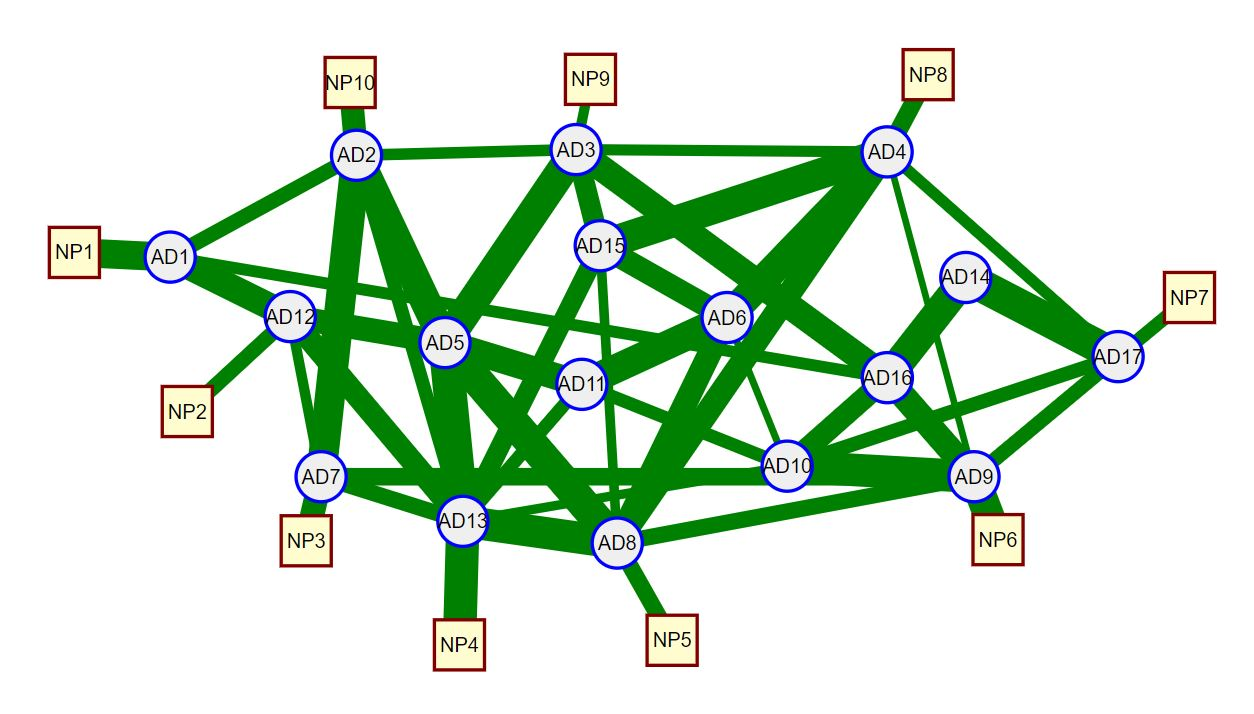

In [1]:
import networkx as nx
import json

In [2]:
#Basic Network Info 

gnl = json.load(open("nwDesign.json")) # For demo only, this should be your network!
g = nx.json_graph.node_link_graph(gnl)

switches = []
hosts = [] 
for n in g.nodes():
    if g.node[n]['type'] == 'host':
        hosts.append(n)
    if g.node[n]['type'] == 'switch':
        switches.append(n)

num_switch = len(switches)
num_host = len(hosts)

print(f"\nNumber of Nodes: {g.number_of_nodes()}, Number of Edges: {g.number_of_edges()}")
print("\nNumber of Switches: {}, Number of Hosts: {}".format(num_switch, num_host))



Number of Nodes: 27, Number of Edges: 52

Number of Switches: 17, Number of Hosts: 10


In [3]:
#Part(1b) 

def pathCap(path, g, cap="capacity"):
    p_cap = float("inf")
    for i in range(len(path)-1):
        if not g.has_edge(path[i], path[i+1]):
            raise Exception('Bad Path')
        else:
            p_cap = min(p_cap, g[path[i]][path[i+1]][cap])
    if p_cap == float("inf"):
        p_cap = 0
    return p_cap


def pathCost(path, g, weight="weight"):
    p_cost = 0.0
    for i in range(len(path)-1):
        if not g.has_edge(path[i], path[i+1]):
            raise Exception('Bad Path')
        else:
            p_cost += g[path[i]][path[i+1]][weight]
    return p_cost

In [4]:
src = "NP3"
dest = "NP8"
my_paths = []
path_gen = nx.shortest_simple_paths(g, src, dest, weight='weight')

n=0
for path in path_gen:
    print (f"Cost: {pathCost(path,g)}, Capacity: {pathCap(path,g)}, {path}, Path Length: {len(path)}")   
    if n>2999 :
        break
    n+= 1    
    my_paths.append(path)

Cost: 673.15, Capacity: 32.164, ['NP3', 'AD7', 'AD13', 'AD11', 'AD6', 'AD4', 'NP8'], Path Length: 7
Cost: 712.61, Capacity: 41.134, ['NP3', 'AD7', 'AD13', 'AD15', 'AD4', 'NP8'], Path Length: 6
Cost: 715.5999999999999, Capacity: 41.134, ['NP3', 'AD7', 'AD13', 'AD8', 'AD4', 'NP8'], Path Length: 6
Cost: 722.52, Capacity: 41.134, ['NP3', 'AD7', 'AD13', 'AD8', 'AD6', 'AD4', 'NP8'], Path Length: 7
Cost: 752.06, Capacity: 24.977, ['NP3', 'AD7', 'AD2', 'AD3', 'AD4', 'NP8'], Path Length: 6
Cost: 765.83, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD5', 'AD11', 'AD6', 'AD4', 'NP8'], Path Length: 8
Cost: 771.46, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD5', 'AD3', 'AD4', 'NP8'], Path Length: 7
Cost: 776.95, Capacity: 41.134, ['NP3', 'AD7', 'AD13', 'AD15', 'AD6', 'AD4', 'NP8'], Path Length: 7
Cost: 792.22, Capacity: 11.757, ['NP3', 'AD7', 'AD13', 'AD10', 'AD6', 'AD4', 'NP8'], Path Length: 7
Cost: 805.498, Capacity: 24.977, ['NP3', 'AD7', 'AD13', 'AD15', 'AD3', 'AD4', 'NP8'], Path Length: 7
Cost: 8

Cost: 1378.6399999999999, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD5', 'AD2', 'AD13', 'AD8', 'AD4', 'NP8'], Path Length: 9
Cost: 1378.98, Capacity: 19.921, ['NP3', 'AD7', 'AD12', 'AD13', 'AD5', 'AD8', 'AD15', 'AD4', 'NP8'], Path Length: 9
Cost: 1379.28, Capacity: 19.921, ['NP3', 'AD7', 'AD2', 'AD13', 'AD8', 'AD15', 'AD6', 'AD4', 'NP8'], Path Length: 9
Cost: 1379.51, Capacity: 10.352, ['NP3', 'AD7', 'AD13', 'AD8', 'AD5', 'AD11', 'AD10', 'AD16', 'AD9', 'AD4', 'NP8'], Path Length: 11
Cost: 1379.56, Capacity: 26.177, ['NP3', 'AD7', 'AD9', 'AD16', 'AD10', 'AD17', 'AD4', 'NP8'], Path Length: 8
Cost: 1379.7800000000002, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD13', 'AD11', 'AD10', 'AD9', 'AD17', 'AD4', 'NP8'], Path Length: 10
Cost: 1379.838, Capacity: 19.921, ['NP3', 'AD7', 'AD12', 'AD5', 'AD11', 'AD13', 'AD8', 'AD15', 'AD3', 'AD4', 'NP8'], Path Length: 11
Cost: 1380.628, Capacity: 19.005, ['NP3', 'AD7', 'AD13', 'AD10', 'AD11', 'AD5', 'AD3', 'AD15', 'AD6', 'AD4', 'NP8'], Path Length: 11

Cost: 1533.23, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD5', 'AD3', 'AD16', 'AD10', 'AD17', 'AD4', 'NP8'], Path Length: 10
Cost: 1533.3500000000001, Capacity: 10.352, ['NP3', 'AD7', 'AD12', 'AD1', 'AD2', 'AD13', 'AD8', 'AD9', 'AD4', 'NP8'], Path Length: 10
Cost: 1533.368, Capacity: 31.451, ['NP3', 'AD7', 'AD13', 'AD5', 'AD11', 'AD10', 'AD16', 'AD3', 'AD15', 'AD6', 'AD4', 'NP8'], Path Length: 12
Cost: 1533.43, Capacity: 10.352, ['NP3', 'AD7', 'AD12', 'AD5', 'AD8', 'AD15', 'AD6', 'AD10', 'AD9', 'AD4', 'NP8'], Path Length: 11
Cost: 1533.568, Capacity: 11.757, ['NP3', 'AD7', 'AD12', 'AD5', 'AD11', 'AD13', 'AD10', 'AD6', 'AD15', 'AD3', 'AD4', 'NP8'], Path Length: 12
Cost: 1533.81, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD5', 'AD2', 'AD13', 'AD11', 'AD6', 'AD15', 'AD4', 'NP8'], Path Length: 11
Cost: 1533.9099999999999, Capacity: 10.352, ['NP3', 'AD7', 'AD13', 'AD15', 'AD8', 'AD6', 'AD10', 'AD9', 'AD4', 'NP8'], Path Length: 10
Cost: 1534.2199999999998, Capacity: 26.177, ['NP3', 'AD7', 'A

Cost: 1628.1100000000001, Capacity: 19.921, ['NP3', 'AD7', 'AD13', 'AD11', 'AD6', 'AD15', 'AD8', 'AD9', 'AD17', 'AD4', 'NP8'], Path Length: 11
Cost: 1628.1480000000001, Capacity: 26.177, ['NP3', 'AD7', 'AD13', 'AD15', 'AD3', 'AD5', 'AD11', 'AD10', 'AD17', 'AD4', 'NP8'], Path Length: 11
Cost: 1628.76, Capacity: 19.005, ['NP3', 'AD7', 'AD13', 'AD10', 'AD11', 'AD5', 'AD8', 'AD15', 'AD6', 'AD4', 'NP8'], Path Length: 11
Cost: 1629.0880000000002, Capacity: 11.757, ['NP3', 'AD7', 'AD13', 'AD5', 'AD2', 'AD3', 'AD15', 'AD6', 'AD10', 'AD17', 'AD4', 'NP8'], Path Length: 12
Cost: 1629.178, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD5', 'AD11', 'AD10', 'AD9', 'AD16', 'AD3', 'AD15', 'AD6', 'AD4', 'NP8'], Path Length: 13
Cost: 1629.3700000000003, Capacity: 26.177, ['NP3', 'AD7', 'AD13', 'AD5', 'AD8', 'AD9', 'AD10', 'AD17', 'AD4', 'NP8'], Path Length: 10
Cost: 1629.4379999999999, Capacity: 11.757, ['NP3', 'AD7', 'AD12', 'AD5', 'AD3', 'AD15', 'AD8', 'AD13', 'AD10', 'AD6', 'AD4', 'NP8'], Path Length: 1

Cost: 1701.87, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD1', 'AD2', 'AD3', 'AD5', 'AD8', 'AD6', 'AD15', 'AD4', 'NP8'], Path Length: 12
Cost: 1701.87, Capacity: 24.977, ['NP3', 'AD7', 'AD2', 'AD1', 'AD12', 'AD13', 'AD8', 'AD5', 'AD3', 'AD4', 'NP8'], Path Length: 11
Cost: 1701.9700000000003, Capacity: 11.757, ['NP3', 'AD7', 'AD2', 'AD13', 'AD12', 'AD5', 'AD11', 'AD10', 'AD6', 'AD4', 'NP8'], Path Length: 11
Cost: 1701.98, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD1', 'AD2', 'AD3', 'AD5', 'AD11', 'AD13', 'AD8', 'AD4', 'NP8'], Path Length: 12
Cost: 1702.1599999999999, Capacity: 10.352, ['NP3', 'AD7', 'AD13', 'AD10', 'AD11', 'AD5', 'AD3', 'AD16', 'AD9', 'AD4', 'NP8'], Path Length: 11
Cost: 1702.25, Capacity: 11.757, ['NP3', 'AD7', 'AD9', 'AD10', 'AD6', 'AD15', 'AD8', 'AD4', 'NP8'], Path Length: 9
Cost: 1702.2600000000002, Capacity: 22.594, ['NP3', 'AD7', 'AD12', 'AD13', 'AD8', 'AD6', 'AD11', 'AD10', 'AD17', 'AD4', 'NP8'], Path Length: 11
Cost: 1702.498, Capacity: 26.177, ['NP3', 'AD7', '

In [5]:
print(f"Total number of simple paths between NP3 and NP8: {len(my_paths)}")

Total number of simple paths between NP3 and NP8: 3000


In [6]:
#Part(1c) 

wide = ["NP1","AD1","AD12","AD5","AD3","AD16","AD14","AD17","NP7"] 
print (f"Cost:{pathCost(wide,g)},Capacity: {pathCap(wide,g)},Widest Path: {wide},Path Length: {len(wide)}")
    

Cost:1066.76,Capacity: 33.232,Widest Path: ['NP1', 'AD1', 'AD12', 'AD5', 'AD3', 'AD16', 'AD14', 'AD17', 'NP7'],Path Length: 9


## Problem 2. Creating the Paths via OpenFlow


**(a)** Create a Python function that takes the graph from your network and two nodes, say A and B, which are connected by a link and gives the port that one would take to get from node A to node B. Test it on a couple examples in your network.

**(b)** To allow us to set up specific paths we need to match on *both* source and destination Ethernet addresses. How would you specify the match fields for your two paths from problem 1?

**(c)** Create a Python function to setup a given path using the Ryu REST interface, matching on source and destination address. This function will need to take the path as a list of nodes, the network graph, and a mapping between switch names and DPIDs.



In [7]:
#Part(2a)

def output_port(a,b,g):
    edge = g.get_edge_data(a,b)
    if edge == None:
        print(f"Nodes {a} and {b} are not connected!")
        return None
    return g.get_edge_data(a,b)["ports"][a]

In [8]:
output_port("AD5","AD11",g)

2

In [9]:
#Part(2b)

match ={"dl_src": "Source ethernet address", "dl_dst": "Destination ethernet address"}

In [10]:
#Part(2c)

g.node["NP5"]["mac"]
import requests

In [11]:

def setup_path (path,g,name_dpid=None):
    src = g.node[path[0]]["mac"]
    dest = g.node[path[-1]]["mac"]
    print(f"Source: {src}, Destination: {dest}")
    
    for i in range(1, len(path)-1):
        print(f"Switch {path[i]} use port {output_port(path[i], path[i+1],g)}")
        if name_dpid != None:
            msg = {  # Forwarding table entry and switch information
            "dpid": name_dpid[path[i]],   # Switch number here
            "cookie": 1,
            "cookie_mask": 1,
            "table_id": 0,
            "idle_timeout": 0,  # Doesn't idle time out
            "hard_timeout": 0,  # Doesn't hard time out
            "priority": 11111,
            "flags": 1,
            "match":{ "dl_src":src, "dl_dst":dest},
            "actions":[
                    {
                    "type":"OUTPUT",
                    "port": output_port(path[i],path[i+1],g) # Floods out of all the ports except what it came in on
                    }
                ]
             }
            r = requests.post("http://127.0.0.1:8080/stats/flowentry/add", json=msg)  
            print(f"status code: {r.status_code}, response: {r.text}")

## Problem 3. Testing your Paths on your Network

**(a)** Start the Ryu REST application on your "controller" machine. Start the Mininet VM using the *NetRunnerNS.py* program. As we did in Homework #5 create a mapping between switch names and DPIDs.

**(b)** Use the function from problem 2 to set up the "longest path" from problem 1. Use ping in Mininet to check the connectivity and compare this with the path length. Save a screen shot of the ping results.

**(c)** Use the function from problem 2 to set up the "widest path" from problem 1. Use ping in Mininet to check the connectivity and compare this with the path length. Save a screen shot of the ping results.



In [12]:
#Part(3a)

import requests
r = requests.get("http://127.0.0.1:8080/stats/switches")
dpids = r.json()

name_id = {}
for dpid in dpids:
    my_bytes = (dpid).to_bytes(4,'big')
    name = my_bytes.decode('utf8').lstrip('\x00')
    name_id[name] = dpid
print(f"Mapping of Switches and DPIDs are:")
print(name_id)

Mapping of Switches and DPIDs are:
{}


In [13]:
the_path = my_paths[-1]
setup_path(the_path, g, name_id)
the_path.reverse()
setup_path(the_path, g, name_id)

Source: BC:A8:A6:81:3C:48, Destination: BC:A8:A6:81:3C:4D
Switch AD7 use port 4


KeyError: 'AD7'

In [14]:
#Part(3b)

long = ["NP3", "AD7", "AD12", "AD1", "AD2", "AD5", "AD3", "AD16", "AD10", "AD6", "AD4", "NP8"]
print(f"Longest path: {long}")
setup_path(long,g)

Longest path: ['NP3', 'AD7', 'AD12', 'AD1', 'AD2', 'AD5', 'AD3', 'AD16', 'AD10', 'AD6', 'AD4', 'NP8']
Source: BC:A8:A6:81:3C:48, Destination: BC:A8:A6:81:3C:4D
Switch AD7 use port 1
Switch AD12 use port 1
Switch AD1 use port 2
Switch AD2 use port 2
Switch AD5 use port 3
Switch AD3 use port 5
Switch AD16 use port 1
Switch AD10 use port 3
Switch AD6 use port 1
Switch AD4 use port 7


In [15]:
#Part(3c)

print(f"Widest path: {wide}")
setup_path(wide,g)

Widest path: ['NP1', 'AD1', 'AD12', 'AD5', 'AD3', 'AD16', 'AD14', 'AD17', 'NP7']
Source: BC:A8:A6:81:3C:46, Destination: BC:A8:A6:81:3C:4C
Switch AD1 use port 1
Switch AD12 use port 2
Switch AD5 use port 3
Switch AD3 use port 5
Switch AD16 use port 2
Switch AD14 use port 2
Switch AD17 use port 5


## Problem 4. Intercepting Packets with SDN switches (20 pts)

**(a)** Make a copy of the [OutlineAppRyu.py](http://www.grotto-networking.com/code/SDNfun/OutlineAppRyu.py) program. Start this program on your computer (not the mininet computer) with the command `python OutlineAppRyu.py`.  On the Mininet VM run `sudo mn --topo linear,3,2 --controller=remote,ip=192.168.56.1` to create a simple linear network with 3 switches and 2 hosts per switch. Use the appropriate IP address of the controller machine here. Did you see output from the "outline app" look at the code a tell me what methods generated this output.  Does ping work between any of the hosts?

**(b)** Add one line of code to the `switch_features` method in the *Outline app* to turn all the switches into "dumb hubs" as they come up, rerun the Outline app and now try to ping between hosts. Show a screen shot of your results.

**(c)** Make a function similar to `def udp_intercept` but that creates a flow to intercept all ICMP traffic.

**(d)** Call the above function when the switches come up. Verify that ping no longer works between two hosts but that the controller is getting the ICMP messages.



#Part(4a)
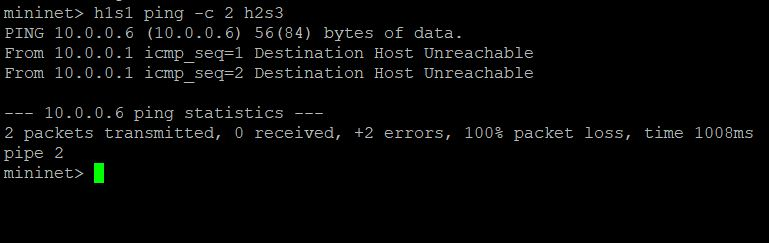

#Part(4b)
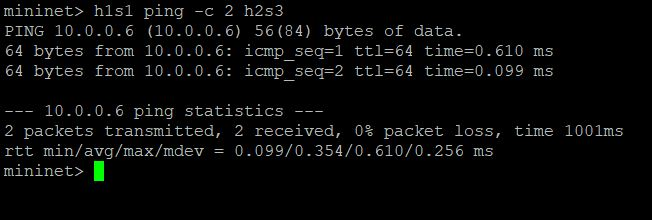

#Part(4c)
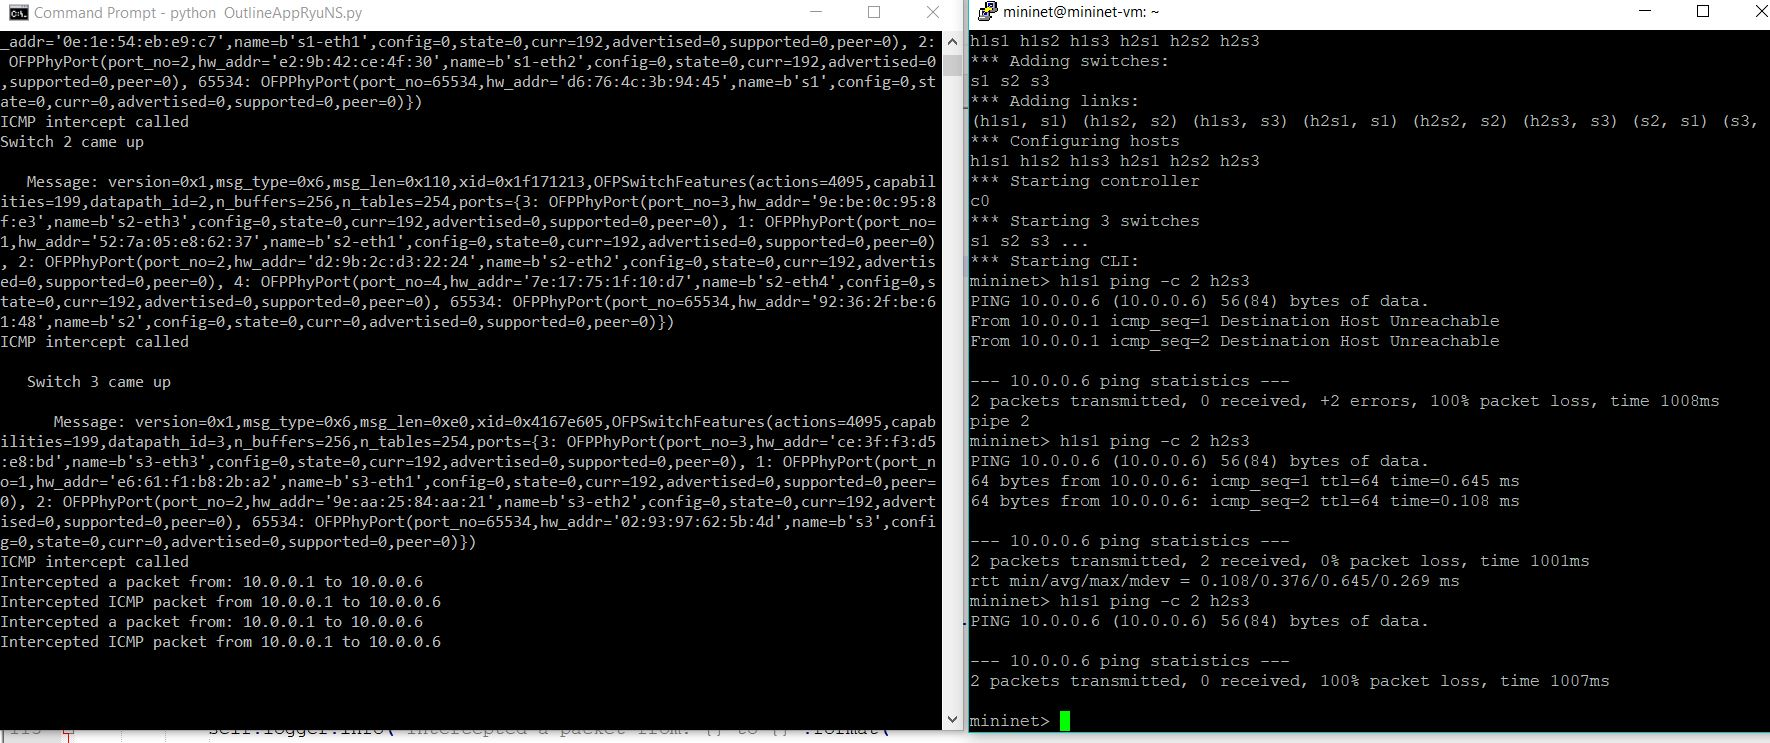

## Problem 5. LLDP for Hosts with Scapy (20 pts)

**(a)** Create a method in the *Outline app* to  create flows to intercept LLDP packets. Call the function to set up the flows when each switch comes up. Remove the call to intercept ICMP packets. Show your code

**(b)** Used scapy to create a Ethernet packet with the Ethertype of LLDP, and destination address of *nearest bridge*

**(c)** Enhance the `packet_in(self, event)` method of the Outline app to log details on LLDP packets received.

**(c)** Use scapy on a one of your Mininet hosts to send an Ethernet LLDP packet towards a switch. Verify that the controller received the LLDP message. Take a screen shot.

